In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Define the file name
file_name = "Car price prediction dataset.csv"

# Delete the file if it exists in the current directory
if os.path.exists(file_name):
    os.remove(file_name)
    print(f"{file_name} has been deleted.")

In [ ]:
from google.colab import files
# Upload the new file
uploaded = files.upload()

# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)
print("Data loaded successfully.")

Saving Car price prediction dataset.csv to Car price prediction dataset.csv
Data loaded successfully.


In [ ]:
# Print a few rows and describe the data
print(df.head())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0           0   Maruti  2014         450000     145500  Diesel  Individual   
1           2  Hyundai  2010         225000     127000  Diesel  Individual   
2           4  Hyundai  2017         440000      45000  Petrol  Individual   
3           7   Toyota  2011         350000      90000  Diesel  Individual   
4           8     Ford  2013         200000     169000  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00         kmpl    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)  
0         1248  
1         1396  

Big Question: "What factors most strongly influence a car's selling price?"



1. Age & Value Relationship:
* How does the car's age (current year - year) relate to selling price?
* Plot: Scatter plot of year vs. selling_price
* Statistics: Correlation coefficient, average price by age groups


In [ ]:
#Cleaning data
# Drop 'Unnamed: 0' and 'Mileage Unit' columns and create a new copy
df = df.drop(['Unnamed: 0', 'Mileage Unit'], axis=1)
print("\nColumns in new DataFrame:")
print(df.columns.tolist())


Columns in new DataFrame:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)', 'Mileage', 'Engine (CC)']


In [ ]:
import seaborn as sns
from scipy import stats
# Calculate car age
current_year = 2024
df['age'] = current_year - df['year']

In [ ]:
import seaborn as sns
from scipy import stats

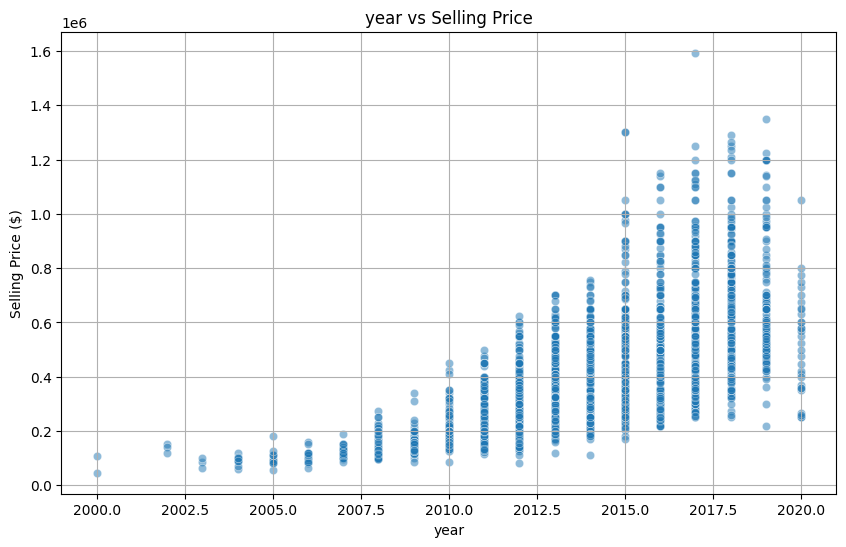

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.5)
plt.title('year vs Selling Price')
plt.xlabel('year')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.show()

The scatter plot shows a positive relationship between year and selling_price (newer cars with less year tend to have higher prices)

In [ ]:
# Calculate correlation coefficient
correlation = df['year'].corr(df['selling_price'])
print("Correlation coefficient between year and selling price:", round(correlation, 3))

Correlation coefficient between year and selling price: 0.669


- The correlation is positive and moderately strong (0.669)
- Being closer to 1 than 0 indicates a clear relationship between car year and price
- As the manufacturing year increases (newer cars), selling price tends to increase
- This means newer cars tend to have higher prices, which is expected

In [ ]:
# Calculate average price by age groups
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 3, 6, 9, 12, 15, 100],
                        labels=['0-3 years', '4-6 years', '7-9 years',
                               '10-12 years', '13-15 years', '15+ years'])

In [ ]:
# Calculate and display average price by age group
age_group_stats = df.groupby('age_group', observed=True).agg({'selling_price': ['count', 'mean']}).round(2)
print("Average age by year group:")
print(age_group_stats)

Average age by year group:
            selling_price           
                    count       mean
age_group                           
4-6 years             347  649210.33
7-9 years             619  536537.91
10-12 years           694  360145.47
13-15 years           327  226954.09
15+ years             108  125957.91


Manufacturing year is a strong predictor of selling price
The price depreciation pattern appears fairly consistent: Around ₹100-150K drop every 3 years
This could be useful for creating a predictive model

2.	Usage Impact
-	How do kilometers driven affect the selling price?
-	Does the impact of km_driven vary by car age?
-	Plot: Scatter plot of km_driven vs. selling_price, colored by age groups
-	Statistics: Correlation analysis


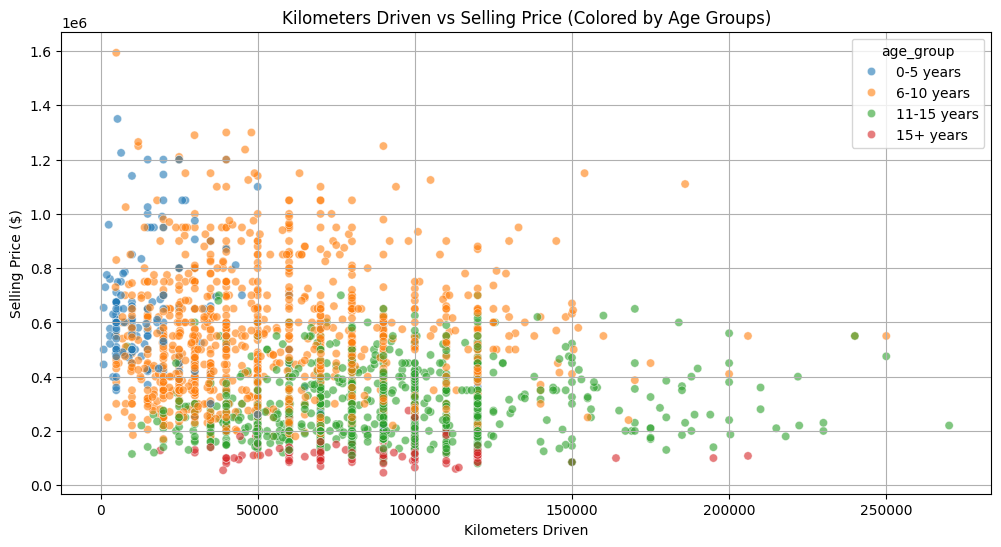

In [ ]:
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 5, 10, 15, 100],
                        labels=['0-5 years', '6-10 years', '11-15 years', '15+ years'])

# Create scatter plot of km_driven vs selling_price, colored by age groups
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='age_group', alpha=0.6)
plt.title('Kilometers Driven vs Selling Price (Colored by Age Groups)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.show()

In [ ]:
# Calculate overall correlation between km_driven and selling_price
correlation = df['km_driven'].corr(df['selling_price'])
print("Overall correlation between kilometers driven and selling price:", round(correlation, 3))

Overall correlation between kilometers driven and selling price: -0.239


- Price spread is wider for cars with lower kilometers.
- As kilometers driven increases, selling price tends to decrease



In [ ]:
# Calculate correlation for each age group
correlations_by_age = df.groupby('age_group',observed=False).apply(lambda x: x['km_driven'].corr(x['selling_price'])).round(3)
print("Correlation between kilometers driven and selling price by age group:")
print(correlations_by_age)

Correlation between kilometers driven and selling price by age group:
age_group
0-5 years     -0.166
6-10 years     0.040
11-15 years    0.118
15+ years     -0.190
dtype: float64


<ipython-input-14-422ae1ae8f34>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations_by_age = df.groupby('age_group',observed=False).apply(lambda x: x['km_driven'].corr(x['selling_price'])).round(3)


- 0-5 years: -0.166 (weak negative)
  Newer cars lose value more consistently with increased kilometers
- 6-10 years: 0.040 (almost no correlation)
- 11-15 years: 0.118 (weak positive)
- 15+ years: -0.190 (weak negative)

Oldest cars show strongest negative correlation with kilometers

3.	Efficiency Factors
-	Do more fuel-efficient cars (higher Mileage) command higher prices?
-	Does fuel type affect pricing?
-	Plot: Box plots of prices by fuel type, scatter plot of Mileage vs. price
-	Statistics: correlation


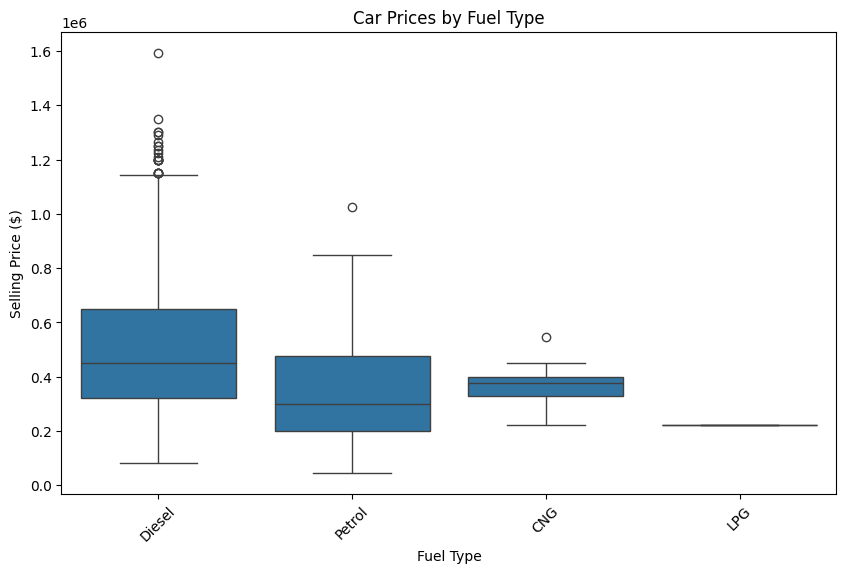

In [ ]:
#Create box plot for prices by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

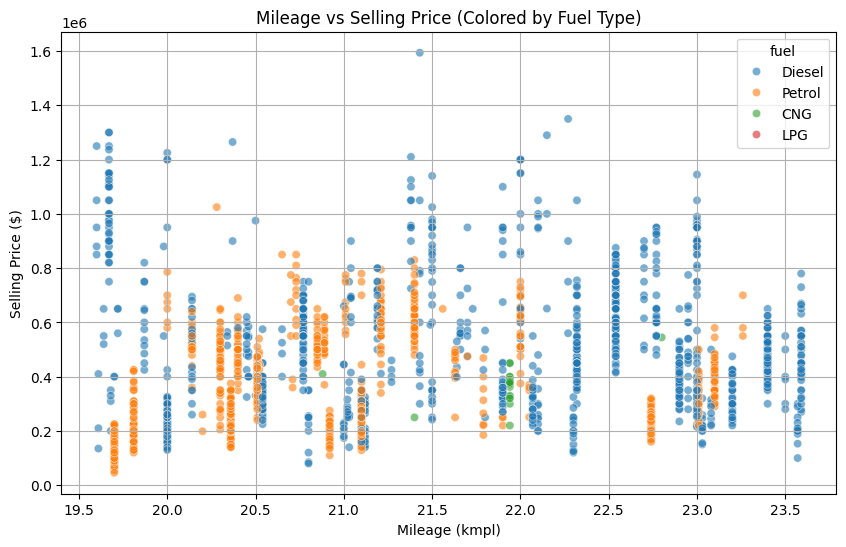

In [ ]:
#Create scatter plot for Mileage vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='selling_price', hue='fuel', data=df, alpha=0.6)
plt.title('Mileage vs Selling Price (Colored by Fuel Type)')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.show()

In [ ]:
#Calculate correlation between Mileage and Price
correlation = df['Mileage'].corr(df['selling_price'])
print("Correlation between Mileage and Price:", round(correlation, 3))

Correlation between Mileage and Price: 0.179


As mileage (fuel efficiency) increases, price tends to increase slightly

4.	Power & Performance
-	How does engine power (max_power) affect pricing?
-	Is there a relationship between engine size and price?
-	Plot: Box plots of price ranges by power categories
-	Statistics: ANOVA test


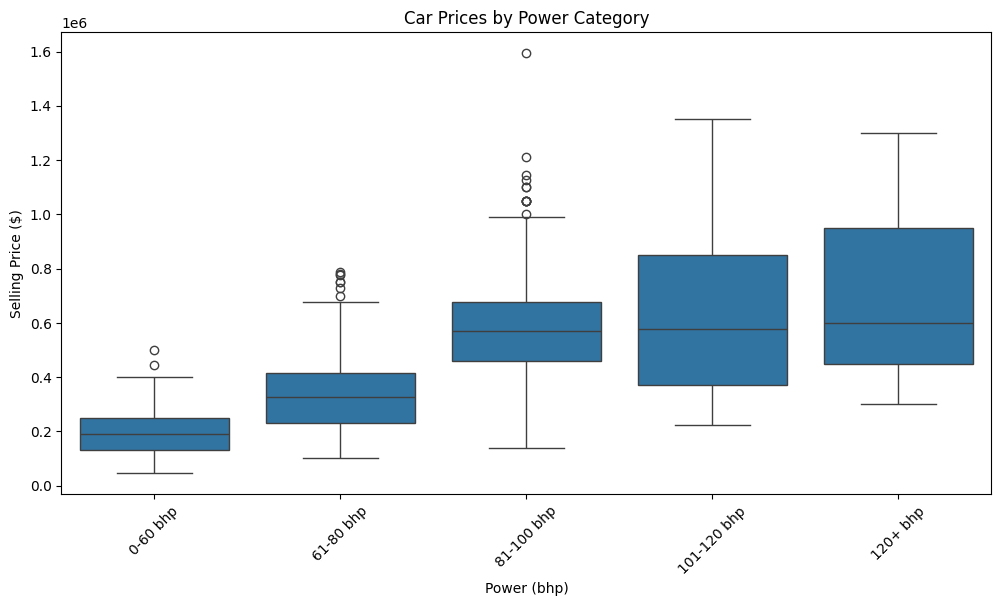

In [ ]:
df['power_category'] = pd.cut(df['max_power (in bph)'],
                            bins=[0, 60, 80, 100, 120, float('inf')],
                            labels=['0-60 bhp', '61-80 bhp', '81-100 bhp', '101-120 bhp', '120+ bhp'])

# 1. Box plot for prices by power categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='power_category', y='selling_price', data=df)
plt.title('Car Prices by Power Category')
plt.xlabel('Power (bhp)')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

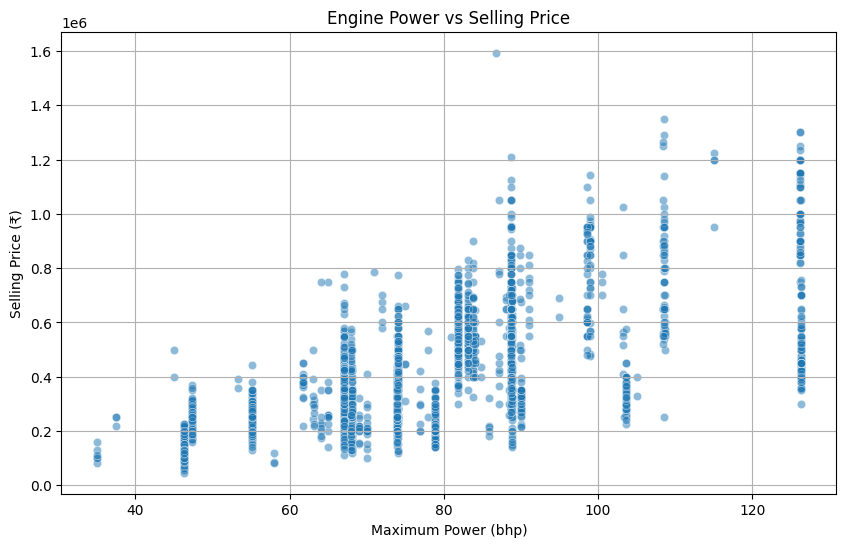

In [ ]:
#Scatter plot of max power vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_power (in bph)', y='selling_price', data=df, alpha=0.5)
plt.title('Engine Power vs Selling Price')
plt.xlabel('Maximum Power (bhp)')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()

In [ ]:
# 3. Calculate correlation between max_power and price
correlation_power = df['max_power (in bph)'].corr(df['selling_price'])
print("Correlation between max power and price:", round(correlation_power, 3))

Correlation between max power and price: 0.678


As engine power increases, price tends to increase

In [ ]:
# Calculate average price by power category
power_stats = df.groupby('power_category', observed=True)['selling_price'].agg(['count', 'mean', 'std']).round(2)
print("Price statistics by power category:")
print(power_stats)

# ANOVA test
from scipy import stats

# Perform one-way ANOVA
power_groups = [group['selling_price'].values for name, group in df.groupby('power_category')]
f_statistic, p_value = stats.f_oneway(*power_groups)

print("\n3. ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.10f}")
if p_value < 0.05:
    print("There is a significant difference in prices across power categories")
else:
    print("There is no significant difference in prices across power categories")

Price statistics by power category:
                count       mean        std
power_category                             
0-60 bhp          366  195039.46   75795.17
61-80 bhp         806  334723.26  123674.57
81-100 bhp        688  576607.52  186415.77
101-120 bhp       114  627921.03  284853.64
120+ bhp          121  708190.02  285518.67

3. ANOVA Test Results:
F-statistic: 512.36
p-value: 0.0000000000
There is a significant difference in prices across power categories


<ipython-input-21-3ccf5b311be8>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_groups = [group['selling_price'].values for name, group in df.groupby('power_category')]


- Price increases consistently with power.
- Price differences between power categories are very distinct.
- Engine power truly affects car prices

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                2095 non-null   object  
 1   year                2095 non-null   int64   
 2   selling_price       2095 non-null   int64   
 3   km_driven           2095 non-null   int64   
 4   fuel                2095 non-null   object  
 5   seller_type         2095 non-null   object  
 6   transmission        2095 non-null   object  
 7   owner               2095 non-null   object  
 8   seats               2095 non-null   int64   
 9   max_power (in bph)  2095 non-null   float64 
 10  Mileage             2095 non-null   float64 
 11  Engine (CC)         2095 non-null   int64   
 12  age                 2095 non-null   int64   
 13  age_group           2095 non-null   category
 14  power_category      2095 non-null   category
dtypes: category(2), float64(2), int64(6), 

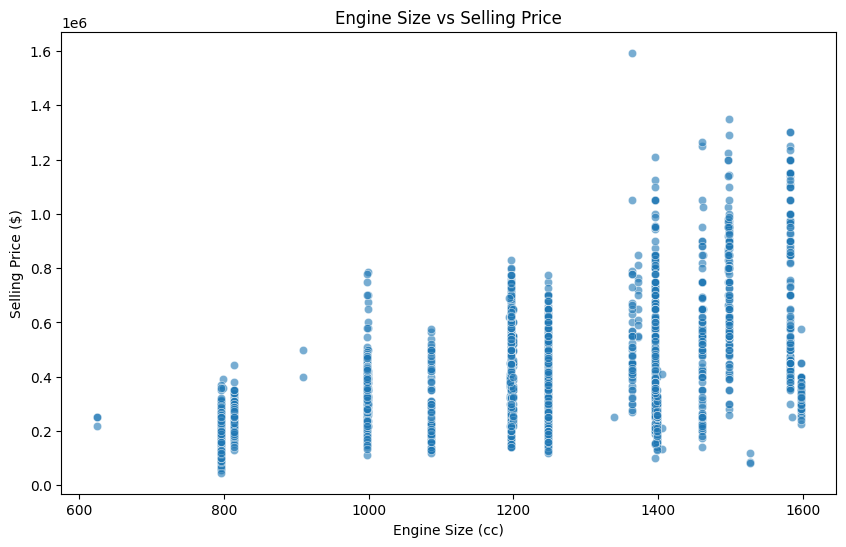

Engine vs Selling Price Analysis Statistics:
Correlation: 0.57
Mean Engine Size: 1205.08
Mean Selling Price: $427279.88
Engine Size Standard Deviation: 245.06
Selling Price Standard Deviation: $232669.85


In [ ]:
# Scatter plot for engine size vs selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine (CC)', y='selling_price', data=df, alpha=0.6)
plt.title("Engine Size vs Selling Price")
plt.xlabel("Engine Size (cc)")
plt.ylabel("Selling Price ($)")
plt.show()

# Calculate and display statistics
correlation = df['Engine (CC)'].corr(df['selling_price'])
mean_engine = df['Engine (CC)'].mean()
mean_selling_price = df['selling_price'].mean()
std_engine = df['Engine (CC)'].std()
std_selling_price = df['selling_price'].std()

print("Engine vs Selling Price Analysis Statistics:")
print(f"Correlation: {correlation:.2f}")
print(f"Mean Engine Size: {mean_engine:.2f}")
print(f"Mean Selling Price: ${mean_selling_price:.2f}")
print(f"Engine Size Standard Deviation: {std_engine:.2f}")
print(f"Selling Price Standard Deviation: ${std_selling_price:.2f}")

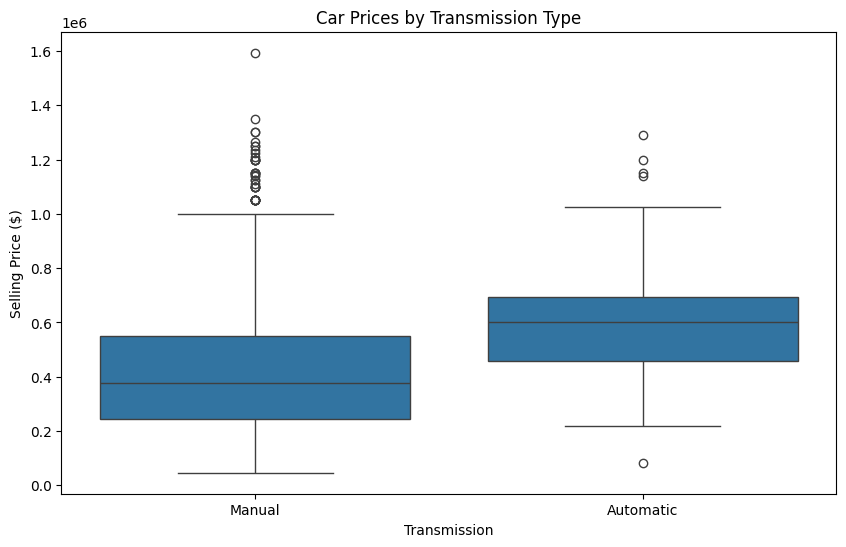


Price statistics by transmission type:
              count       mean        std
transmission                             
Automatic        99  605707.03  216038.01
Manual         1996  418430.04  229936.48


In [ ]:
#Box plot of prices by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Car Prices by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price ($)')
plt.show()

# Calculate average prices by transmission
transmission_stats = df.groupby('transmission')['selling_price'].agg(['count', 'mean', 'std']).round(2)
print("\nPrice statistics by transmission type:")
print(transmission_stats)

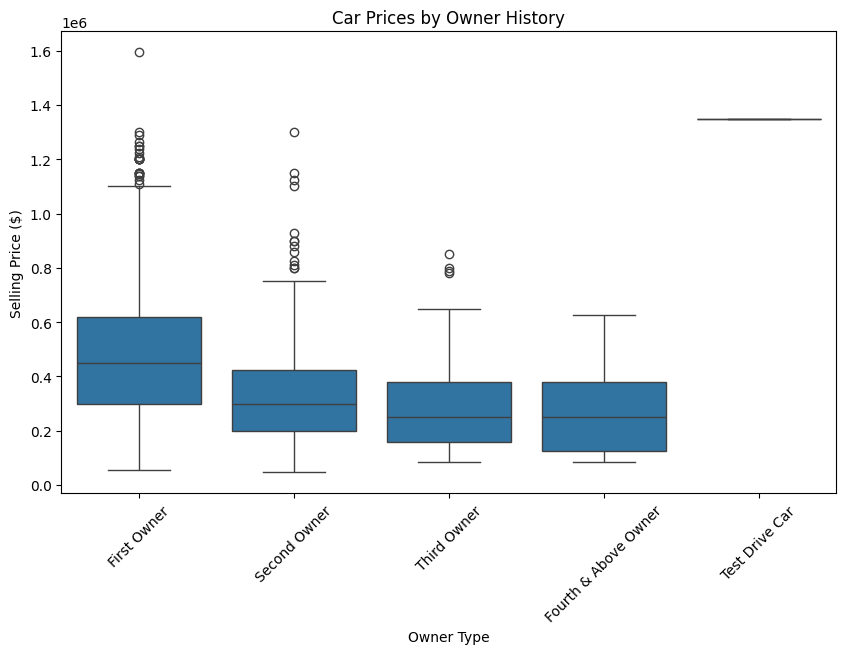


Price statistics by owner type:
                      count        mean        std
owner                                             
First Owner            1325   486206.37  239604.88
Fourth & Above Owner     37   268621.54  155074.17
Second Owner            586   336392.36  177120.33
Test Drive Car            1  1350000.00        NaN
Third Owner             146   291184.90  170215.19


In [ ]:
# Box plot of prices by owner type
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Car Prices by Owner History')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

# Calculate average prices by owner type
owner_stats = df.groupby('owner')['selling_price'].agg(['count', 'mean', 'std']).round(2)
print("\nPrice statistics by owner type:")
print(owner_stats)

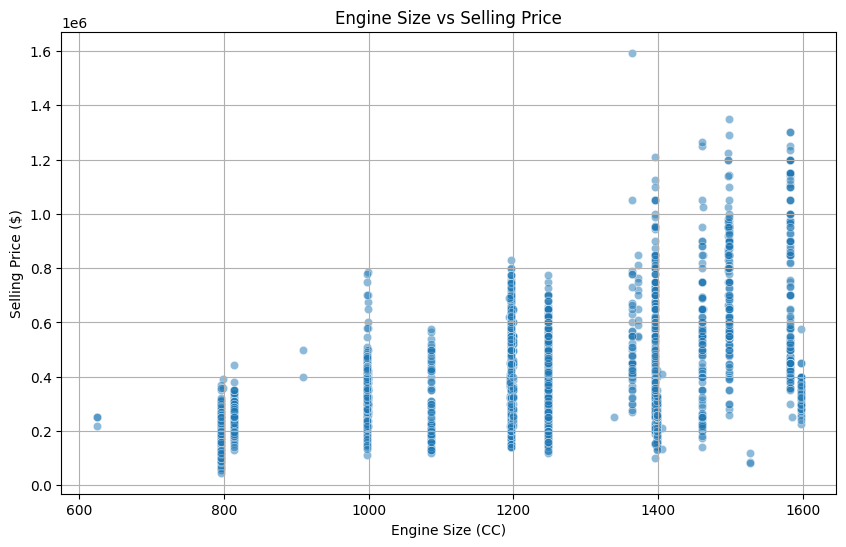


Correlation between engine size and price: 0.569


In [ ]:
# Scatter plot of engine size vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine (CC)', y='selling_price', data=df, alpha=0.5)
plt.title('Engine Size vs Selling Price')
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation_engine = df['Engine (CC)'].corr(df['selling_price'])
print(f"\nCorrelation between engine size and price: {correlation_engine:.3f}")

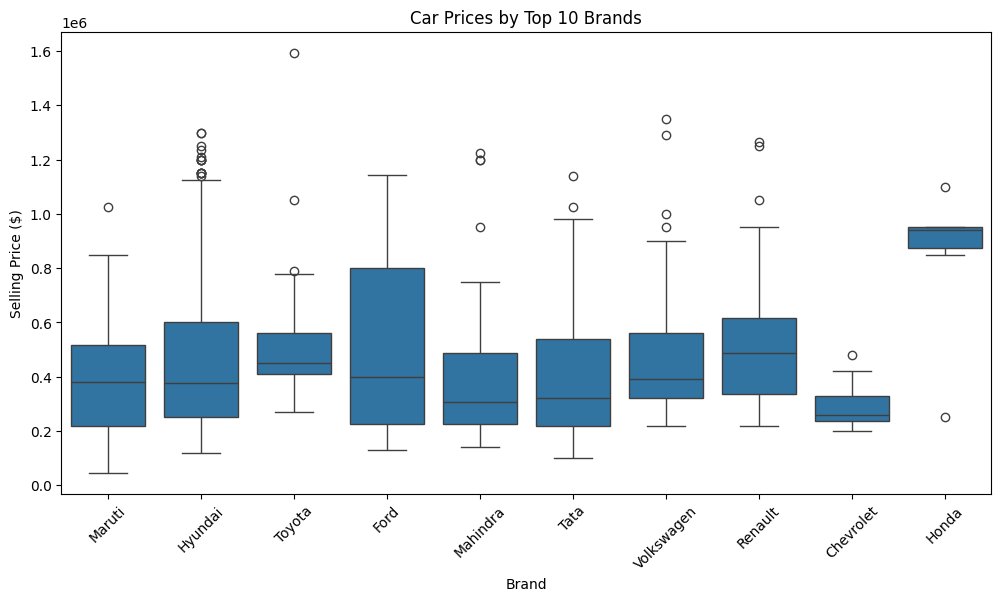

In [ ]:
# Extract brand from name
df['brand'] = df['name'].apply(lambda x: x.split()[0])

# Box plot of prices by top 10 brands
top_10_brands = df.groupby('brand')['selling_price'].count().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['brand'].isin(top_10_brands)], x='brand', y='selling_price')
plt.title('Car Prices by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

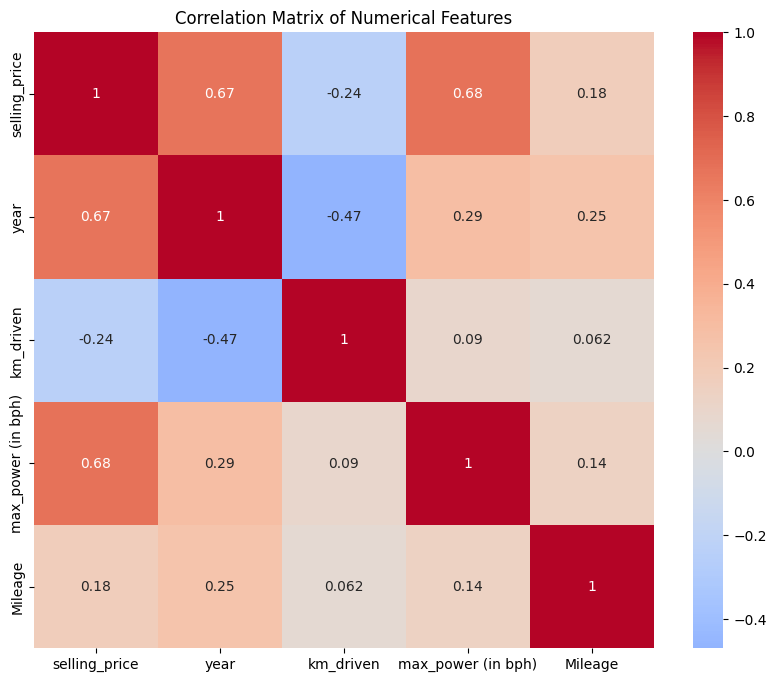

In [ ]:
# Correlation matrix for numerical features
numerical_features = ['selling_price', 'year', 'km_driven', 'max_power (in bph)',
                     'Mileage']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
numeric_features = ['year', 'km_driven', 'max_power (in bph)','Engine (CC)']
categorical_features = ['transmission', 'fuel', 'owner']

# Prepare features (X) and target (y)
X = df[numeric_features + categorical_features]
y = df['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # Fixed here

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Model Performance Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"CV Mean R² Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model Performance Metrics:
R² Score: 0.741
Root Mean Square Error: 110618.03
CV Mean R² Score: 0.725 (+/- 0.058)


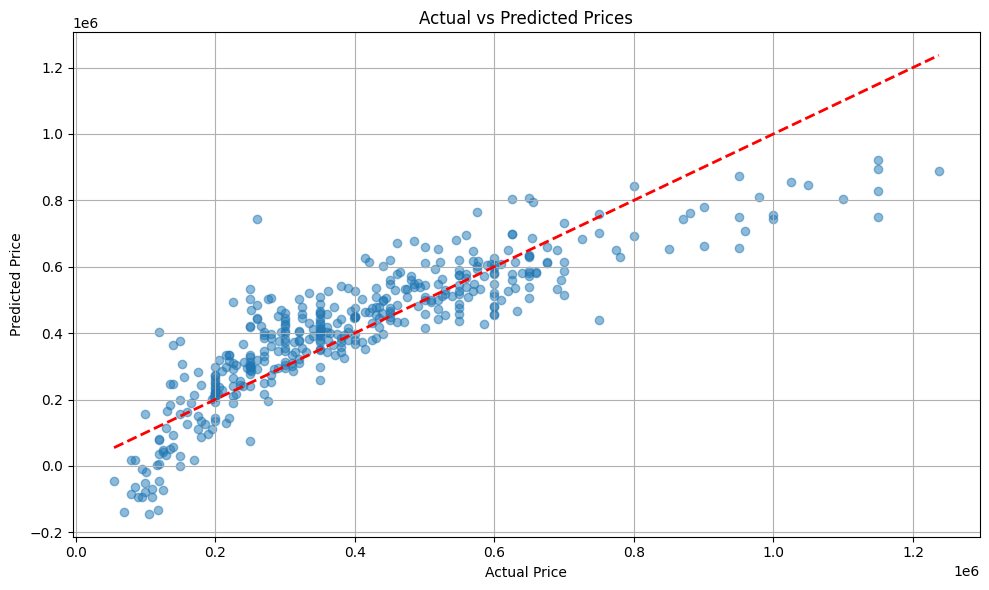

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Split training data to create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Random Forest Pipeline
rf_model = Pipeline([
   ('preprocessor', preprocessor),
   ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Fit model
rf_model.fit(X_train, y_train)

# Make predictions
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
val_mse = mean_squared_error(y_val, rf_val_pred)
test_mse = mean_squared_error(y_test, rf_test_pred)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)
val_r2 = r2_score(y_val, rf_val_pred)
test_r2 = r2_score(y_test, rf_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("\nRandom Forest Performance:")
print(f"Validation R²: {val_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"CV Mean R² Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Random Forest Performance:
Validation R²: 0.872
Test R²: 0.841
Validation RMSE: 85348.22
Test RMSE: 86658.98
CV Mean R² Score: 0.858 (+/- 0.042)


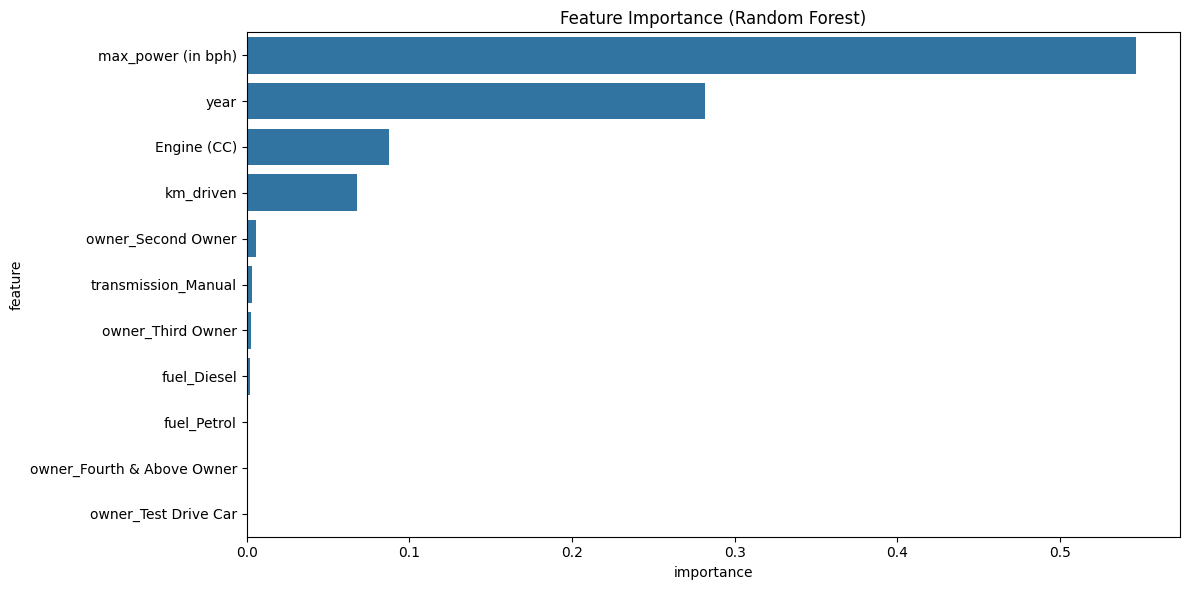

In [ ]:
# Feature importance plot
# Get feature names from fitted pipeline
preprocessor_fitted = rf_model['preprocessor']
feature_names = (numeric_features +
                preprocessor_fitted.named_transformers_['cat']
                .get_feature_names_out(categorical_features).tolist())

importances = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model['regressor'].feature_importances_
})

plt.figure(figsize=(12, 6))
sns.barplot(data=importances.sort_values('importance', ascending=False),
            x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

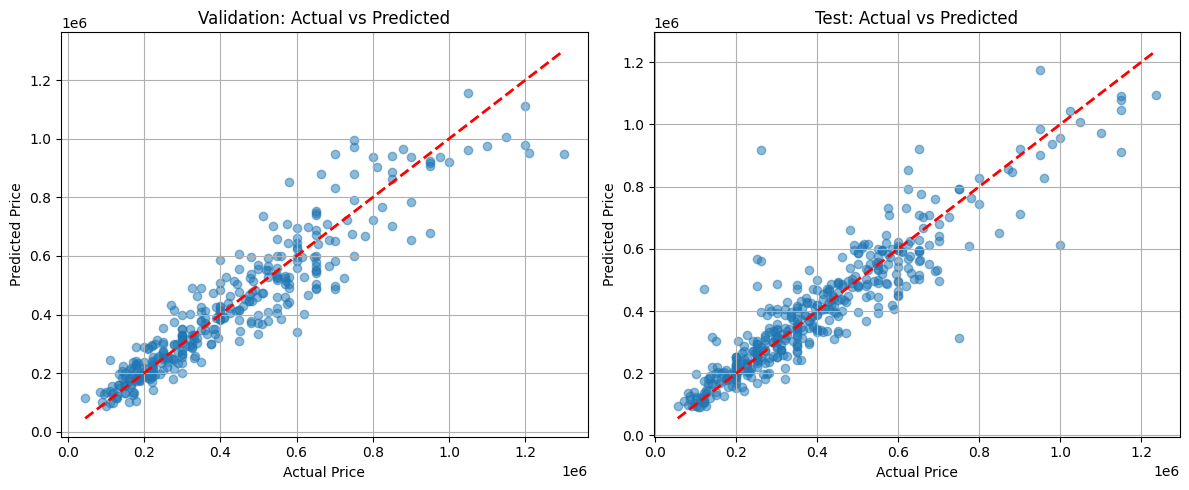

In [ ]:
# Plot actual vs predicted for validation and test sets
plt.figure(figsize=(12, 5))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, rf_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Validation: Actual vs Predicted')
plt.grid(True)

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# XGBoost Model
from xgboost import XGBRegressor
xgb_model = Pipeline([
   ('preprocessor', preprocessor),
   ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_val_pred = xgb_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate metrics
val_mse = mean_squared_error(y_val, xgb_val_pred)
test_mse = mean_squared_error(y_test, xgb_test_pred)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)
val_r2 = r2_score(y_val, xgb_val_pred)
test_r2 = r2_score(y_test, xgb_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print("\nXGBoost Performance:")
print(f"Validation R²: {val_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"CV Mean R² Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



XGBoost Performance:
Validation R²: 0.878
Test R²: 0.852
Validation RMSE: 83439.69
Test RMSE: 83755.44
CV Mean R² Score: 0.853 (+/- 0.052)


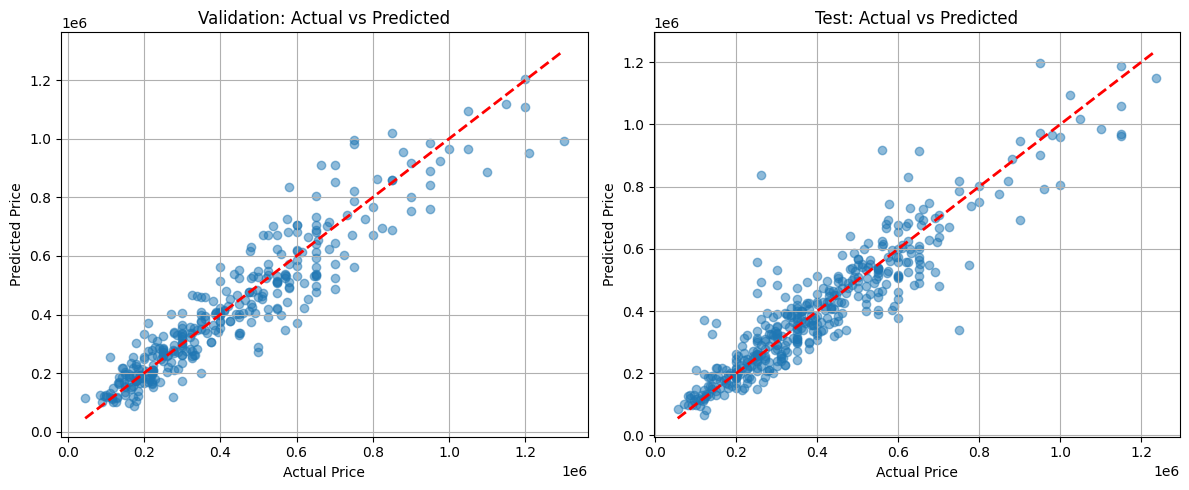

In [ ]:
# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, xgb_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Validation: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Neural Network
# Scale features
preprocessed_train = preprocessor.fit_transform(X_train)
preprocessed_val = preprocessor.transform(X_val)
preprocessed_test = preprocessor.transform(X_test)

# Scale target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Define and compile model
nn_model = Sequential([
   Dense(128, activation='relu', input_dim=preprocessed_train.shape[1]),
   Dropout(0.2),
   Dense(32, activation='relu'),
   Dropout(0.2),
   Dense(16, activation='relu'),
   Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train model
history = nn_model.fit(
   preprocessed_train, y_train_scaled,
   validation_data=(preprocessed_val, y_val_scaled),
   epochs=50,
   batch_size=32,
   verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8702 - val_loss: 0.7208
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7441 - val_loss: 0.5565
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6480 - val_loss: 0.4215
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5047 - val_loss: 0.3209
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3672 - val_loss: 0.2617
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3843 - val_loss: 0.2302
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3081 - val_loss: 0.2148
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2763 - val_loss: 0.2057
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2899 - val_loss: 0.1989
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2599 - val_loss: 0.1950
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3018 - val_loss: 0.1926
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2425 - val_loss: 0.1897


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Neural Network Performance:
Validation R²: 0.839
Test R²: 0.834
Validation RMSE: 95879.52
Test RMSE: 88462.39


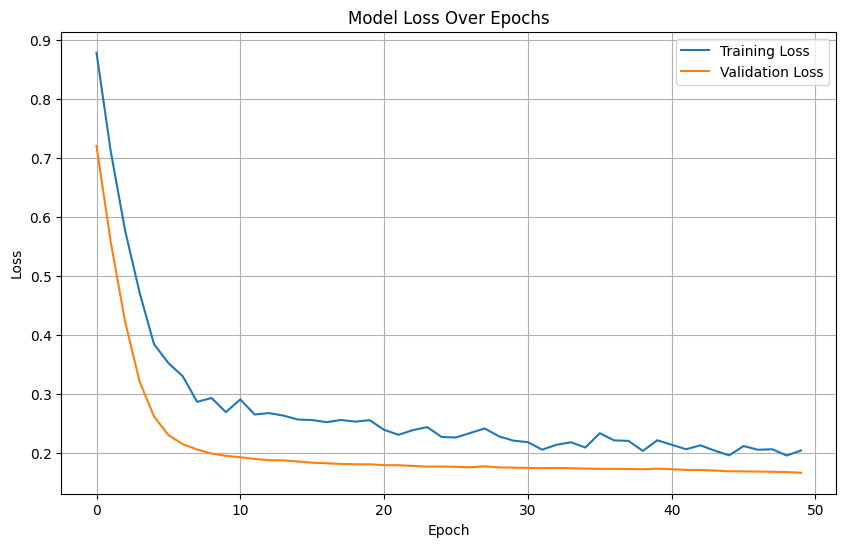

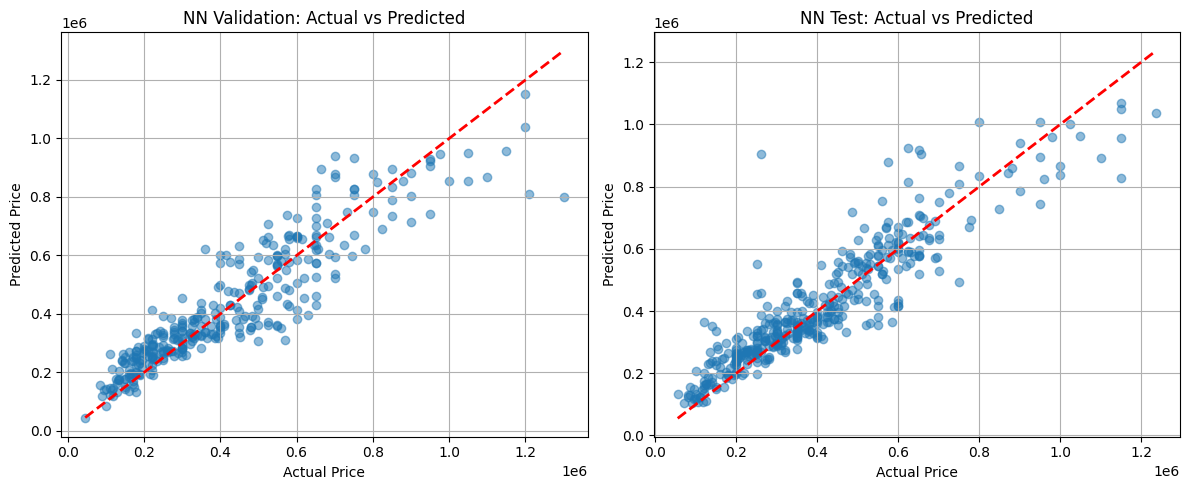

In [ ]:
# Predictions
nn_val_pred_scaled = nn_model.predict(preprocessed_val)
nn_test_pred_scaled = nn_model.predict(preprocessed_test)
nn_val_pred = y_scaler.inverse_transform(nn_val_pred_scaled)
nn_test_pred = y_scaler.inverse_transform(nn_test_pred_scaled)

print("\nNeural Network Performance:")
print(f"Validation R²: {r2_score(y_val, nn_val_pred):.3f}")
print(f"Test R²: {r2_score(y_test, nn_test_pred):.3f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, nn_val_pred)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, nn_test_pred)):.2f}")

# Learning curves plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Neural Network actual vs predicted plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, nn_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('NN Validation: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('NN Test: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# New Modified Neural Network
from tensorflow.keras.layers import BatchNormalization, Activation
nn_model_v2 = Sequential([
    Dense(256),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.2),

    Dense(1)
])

nn_model_v2.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train new model
history_v2 = nn_model_v2.fit(
   preprocessed_train, y_train_scaled,
   validation_data=(preprocessed_val, y_val_scaled),
   epochs=50,
   batch_size=32,
   verbose=1
)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.6225 - val_loss: 0.4129
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0073 - val_loss: 0.4069
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8690 - val_loss: 0.3661
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8171 - val_loss: 0.3173
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7113 - val_loss: 0.3077
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6560 - val_loss: 0.2745
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6665 - val_loss: 0.2598
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6244 - val_loss: 0.2235
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6175 - val_loss: 0.2151
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5277 - val_loss: 0.2071
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5642 - val_loss: 0.2096
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5476 - val_lo

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Modified Neural Network Performance:
Validation R²: 0.839
Test R²: 0.836
Validation RMSE: 95874.01
Test RMSE: 87990.43


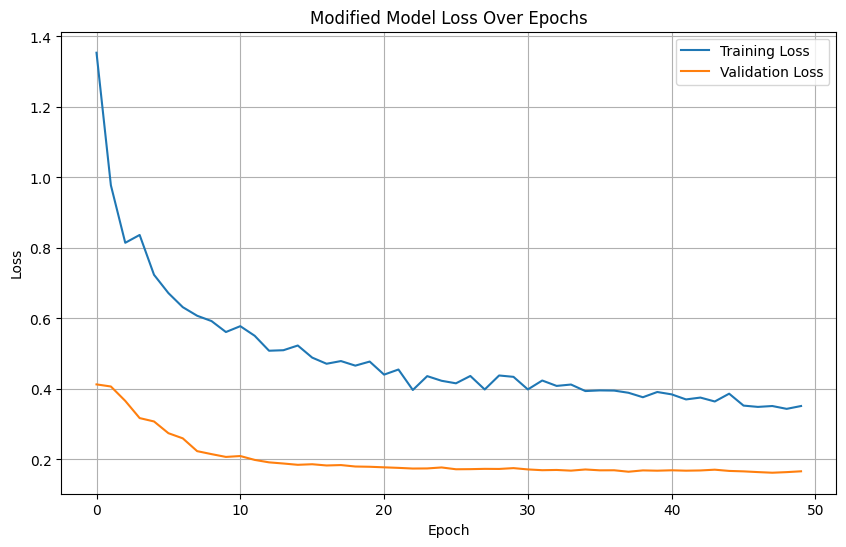

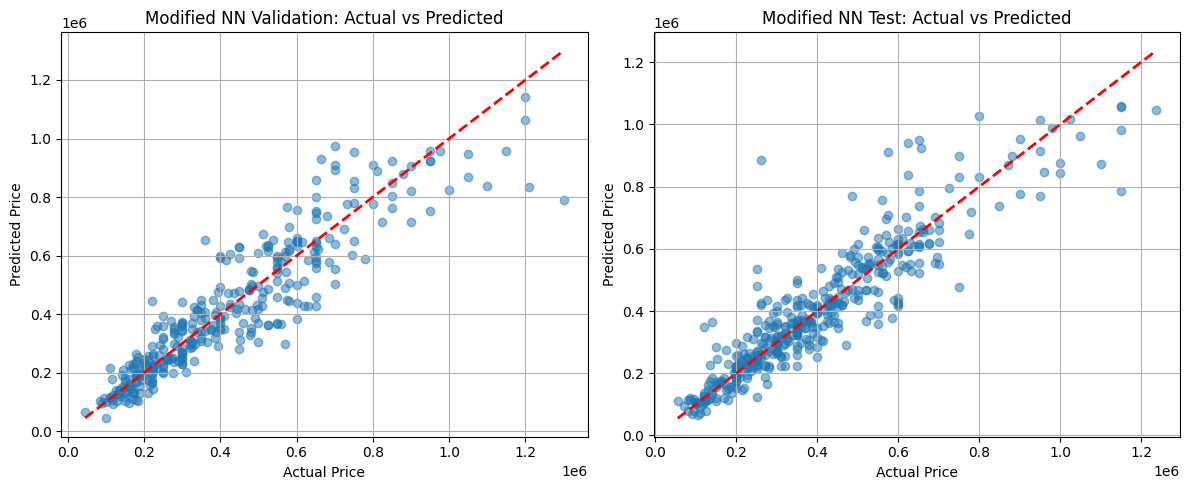

In [ ]:
# Make predictions with new model
nn_val_pred_scaled_v2 = nn_model_v2.predict(preprocessed_val)
nn_test_pred_scaled_v2 = nn_model_v2.predict(preprocessed_test)
nn_val_pred_v2 = y_scaler.inverse_transform(nn_val_pred_scaled_v2)
nn_test_pred_v2 = y_scaler.inverse_transform(nn_test_pred_scaled_v2)

print("\nModified Neural Network Performance:")
print(f"Validation R²: {r2_score(y_val, nn_val_pred_v2):.3f}")
print(f"Test R²: {r2_score(y_test, nn_test_pred_v2):.3f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, nn_val_pred_v2)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, nn_test_pred_v2)):.2f}")

# Plot learning curves for new model
plt.figure(figsize=(10, 6))
plt.plot(history_v2.history['loss'], label='Training Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.title('Modified Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions for new model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, nn_val_pred_v2, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Modified NN Validation: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_test_pred_v2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Modified NN Test: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# New Neural Network with ReLU + BatchNormalization
nn_model_v3 = Sequential([
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dense(1)
])

nn_model_v3.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train model
history_v3 = nn_model_v3.fit(
   preprocessed_train, y_train_scaled,
   validation_data=(preprocessed_val, y_val_scaled),
   epochs=50,
   batch_size=32,
   verbose=1
)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6876 - val_loss: 0.8274
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1596 - val_loss: 0.6365
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9799 - val_loss: 0.5146
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7746 - val_loss: 0.4381
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8074 - val_loss: 0.3702
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6407 - val_loss: 0.3131
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6256 - val_loss: 0.2751
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5825 - val_loss: 0.2530
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5181 - val_loss: 0.2413
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5100 - val_loss: 0.2371
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4987 - val_loss: 0.2307
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4574 - val_lo

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Neural Network with ReLU + BatchNorm Performance:
Validation R²: 0.823
Test R²: 0.830
Validation RMSE: 100379.96
Test RMSE: 89630.88


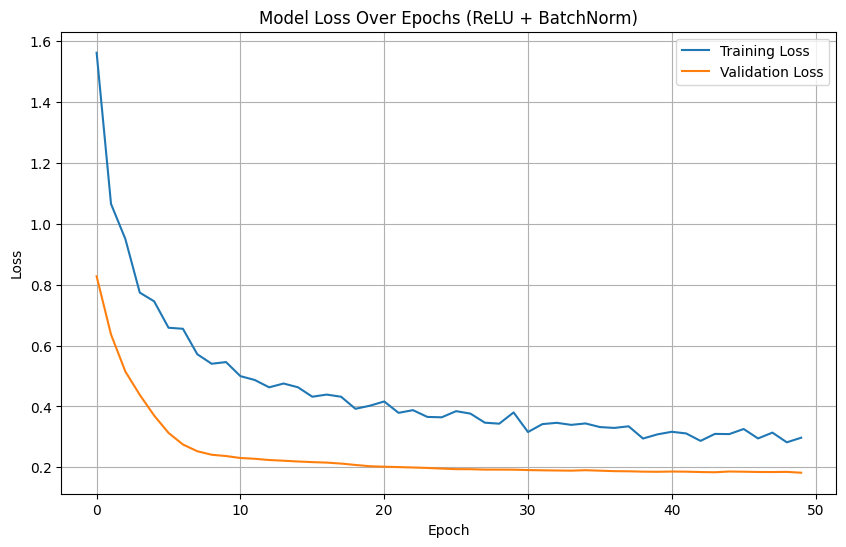

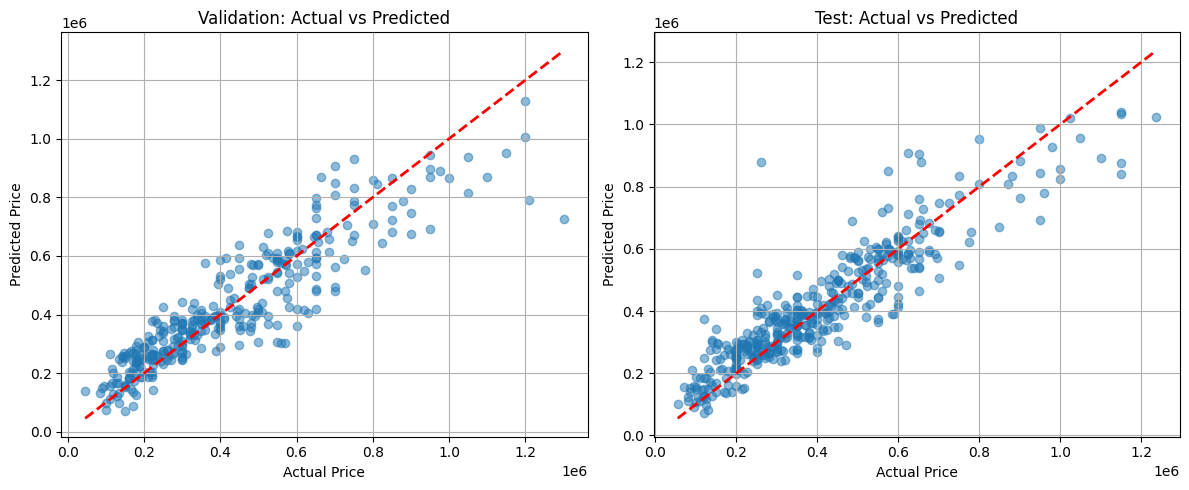

In [ ]:
# Predictions
nn_val_pred_scaled_v3 = nn_model_v3.predict(preprocessed_val)
nn_test_pred_scaled_v3 = nn_model_v3.predict(preprocessed_test)
nn_val_pred_v3 = y_scaler.inverse_transform(nn_val_pred_scaled_v3)
nn_test_pred_v3 = y_scaler.inverse_transform(nn_test_pred_scaled_v3)

print("\nNeural Network with ReLU + BatchNorm Performance:")
print(f"Validation R²: {r2_score(y_val, nn_val_pred_v3):.3f}")
print(f"Test R²: {r2_score(y_test, nn_test_pred_v3):.3f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, nn_val_pred_v3)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, nn_test_pred_v3)):.2f}")

# Learning curves plot
plt.figure(figsize=(10, 6))
plt.plot(history_v3.history['loss'], label='Training Loss')
plt.plot(history_v3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs (ReLU + BatchNorm)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, nn_val_pred_v3, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Validation: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_test_pred_v3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# KNN Model
# Import KNN
from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline([
  ('preprocessor', preprocessor),
  ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Fit model
knn_model.fit(X_train, y_train)

# Make predictions
knn_val_pred = knn_model.predict(X_val)
knn_test_pred = knn_model.predict(X_test)

# Calculate metrics
val_mse = mean_squared_error(y_val, knn_val_pred)
test_mse = mean_squared_error(y_test, knn_test_pred)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)
val_r2 = r2_score(y_val, knn_val_pred)
test_r2 = r2_score(y_test, knn_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='r2')

print("\nKNN Performance:")
print(f"Validation R²: {val_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"CV Mean R² Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


KNN Performance:
Validation R²: 0.845
Test R²: 0.852
Validation RMSE: 93915.87
Test RMSE: 83738.28
CV Mean R² Score: 0.802 (+/- 0.073)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


1. XGBoost emerged as the clear winner, achieving the best balance of accuracy (R² = 0.852) and prediction error (RMSE = 83,755.44). Its performance was also the most consistent across different metrics.

2. An interesting finding was that KNN performed surprisingly well, matching XGBoost's R² score, though with higher variance in cross-validation.

3. The neural network variations, despite their complexity, didn't provide significant advantages over simpler models. This suggests that the relationships in the car price data might be better captured by ensemble methods.

4. Linear regression, while providing a decent baseline, significantly underperformed compared to other models, indicating strong non-linear relationships in the data.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Create a more complex model
nn_model_advanced = Sequential([
    # Input layer with stronger regularization
    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    # Hidden layers with decreasing size
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),

    # Output layer
    Dense(1)
])

# Add callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# Compile with a lower learning rate
nn_model_advanced.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='huber',  # More robust to outliers
    metrics=['mae', 'mse']
)

# Train with callbacks
history_advanced = nn_model_advanced.fit(
    preprocessed_train,
    y_train_scaled,
    validation_data=(preprocessed_val, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.5708 - mae: 0.9626 - mse: 1.5485 - val_loss: 0.3314 - val_mae: 0.7082 - val_mse: 0.7918 - learning_rate: 1.0000e-04
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4330 - mae: 0.8045 - mse: 1.0727 - val_loss: 0.2993 - val_mae: 0.6608 - val_mse: 0.7149 - learning_rate: 1.0000e-04
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3707 - mae: 0.7326 - mse: 0.8727 - val_loss: 0.2716 - val_mae: 0.6141 - val_mse: 0.6449 - learning_rate: 1.0000e-04
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3459 - mae: 0.6926 - mse: 0.8435 - val_loss: 0.2459 - val_mae: 0.5706 - val_mse: 0.5773 - learning_rate: 1.0000e-04
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3013 - mae: 0.6379 - mse: 0.6992 - val_loss: 0.2224 - val_mae: 0.5339 - val_mse: 0.5167 - learning_rate: 1.0000e-04
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2960 - mae: 0.6361 - mse: 0.6701 - val_loss: 0.1836 - val_mae

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Advanced Neural Network Performance:
Validation R²: 0.849
Test R²: 0.837
Validation RMSE: 92689.43
Test RMSE: 87667.38
Validation MAE: 66793.79
Test MAE: 59529.73


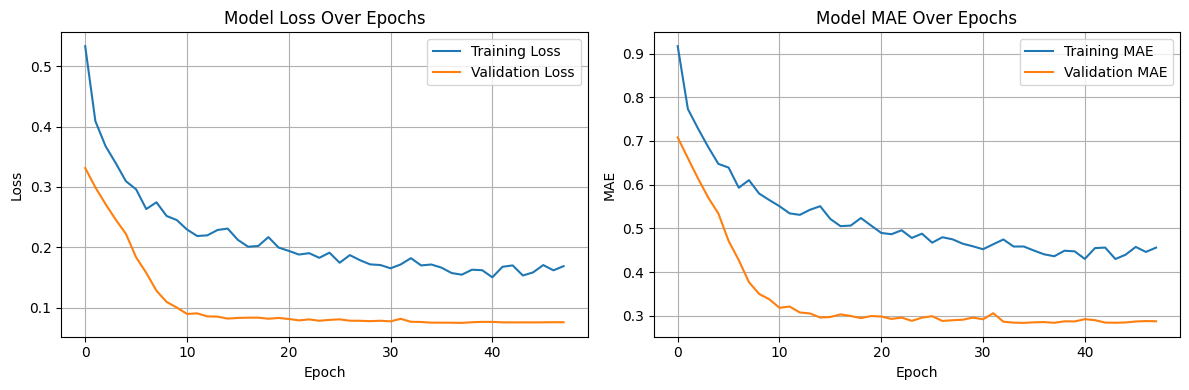

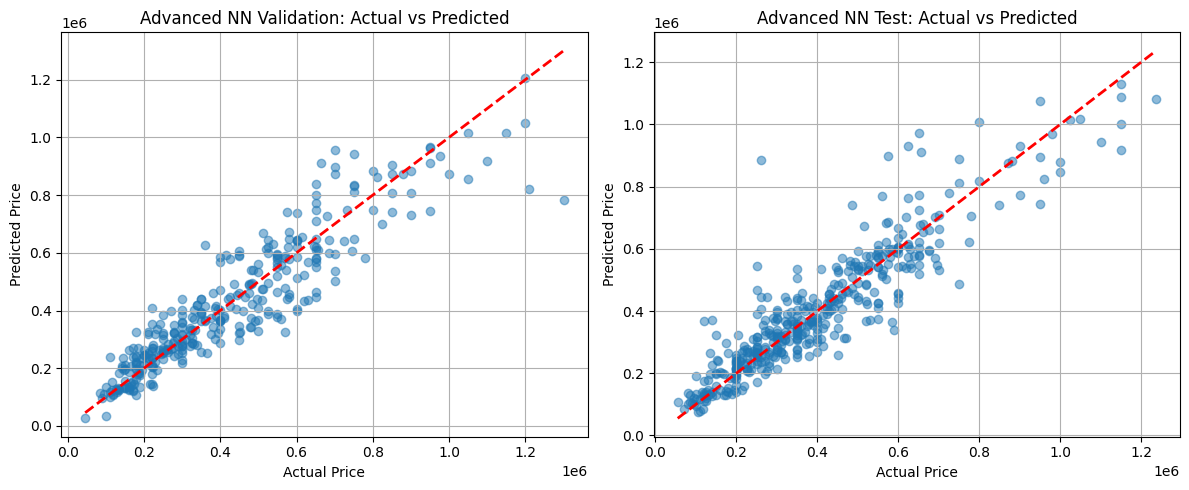

In [ ]:
from sklearn.metrics import mean_absolute_error
# Make predictions
nn_val_pred_scaled_advanced = nn_model_advanced.predict(preprocessed_val)
nn_test_pred_scaled_advanced = nn_model_advanced.predict(preprocessed_test)

# Inverse transform the scaled predictions
nn_val_pred_advanced = y_scaler.inverse_transform(nn_val_pred_scaled_advanced)
nn_test_pred_advanced = y_scaler.inverse_transform(nn_test_pred_scaled_advanced)

# Calculate metrics
print("\nAdvanced Neural Network Performance:")
print(f"Validation R²: {r2_score(y_val, nn_val_pred_advanced):.3f}")
print(f"Test R²: {r2_score(y_test, nn_test_pred_advanced):.3f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, nn_val_pred_advanced)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, nn_test_pred_advanced)):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, nn_val_pred_advanced):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, nn_test_pred_advanced):.2f}")

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_advanced.history['loss'], label='Training Loss')
plt.plot(history_advanced.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot metrics over epochs
plt.subplot(1, 2, 2)
plt.plot(history_advanced.history['mae'], label='Training MAE')
plt.plot(history_advanced.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, nn_val_pred_advanced, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Advanced NN Validation: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_test_pred_advanced, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Advanced NN Test: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()



42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model Performance Metrics:
Training R² (Accuracy): 0.845
Validation R² (Accuracy): 0.849

Training RMSE: 92596.90
Validation RMSE: 92689.43
Training MAE: 65199.90
Validation MAE: 66793.79


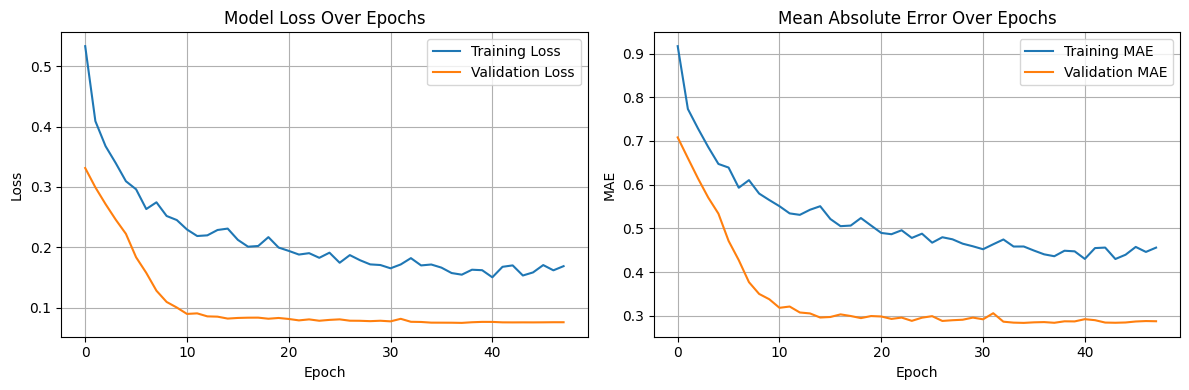

In [ ]:
# Get predictions
train_pred_scaled = nn_model_advanced.predict(preprocessed_train)
val_pred_scaled = nn_model_advanced.predict(preprocessed_val)

# Inverse transform predictions and true values
train_pred = y_scaler.inverse_transform(train_pred_scaled)
val_pred = y_scaler.inverse_transform(val_pred_scaled)
y_train_original = y_scaler.inverse_transform(y_train_scaled)
y_val_original = y_scaler.inverse_transform(y_val_scaled)

# Calculate R² scores (accuracy)
train_r2 = r2_score(y_train_original, train_pred)
val_r2 = r2_score(y_val_original, val_pred)

# Calculate other metrics
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val_original, val_pred))
train_mae = mean_absolute_error(y_train_original, train_pred)
val_mae = mean_absolute_error(y_val_original, val_pred)

# Print results
print("Model Performance Metrics:")
print(f"Training R² (Accuracy): {train_r2:.3f}")
print(f"Validation R² (Accuracy): {val_r2:.3f}")
print(f"\nTraining RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_advanced.history['loss'], label='Training Loss')
plt.plot(history_advanced.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history_advanced.history['mae'], label='Training MAE')
plt.plot(history_advanced.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- Slightly lower performance compared to ensemble methods
- Better performance than the basic neural network versions
- More stable training due to the added regularization and callbacks
- Good generalization with close validation and test metrics

Key Improvements:
- The LeakyReLU activation helped with gradient flow
- Dropout and BatchNormalization reduced overfitting
- The learning rate scheduler and early stopping optimized training
- The Huber loss provided robustness against outliers